In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls '/content/drive/Shared drives'

'Direct Sales Development Analytics Documentation'


In [ ]:
df = pd.read_csv("/content/drive/Shared drives/Direct Sales Development Analytics Documentation/Regression Features.csv")

In [ ]:
df.head()

,PP End,Agent,Spanish (copy),Tenure (month),Title,PA,Site,Team Manager,Prod Hours,Regular Hours,Regular Pay,OT Hours,OT Pay,Total Hours,CTI/Paid Hrs,Wages / Hour,Total Pay,Productivity,Avail%,AHT 1,AHT,Sales Calls,Calls/Hour,Close Rate,Sales,Sales Per Hour,Act %,Act Efficiency %,Activations,Commission / Activations,Total Cost / Hour,CPA,ProdMinutes,Talk,Hold,ACW,Staff,Avail,HandleTime,Answered Calls,Commission,Total Wages
0,1/11/2019,"Acosta, Jonathan",1,11,AE,5,EP,"Holguin, Alex",60,78,1022.66,0,14.10,78,0.77,13.27,2336.31,0.82,0.408,1229.31,0.014228,48,0.61460,0.40,19,0.24328,0.8947,0.94737,17,76.44412,29.9143,137.4300,3586.27,1486.43,33,188,3586.2667,1464.5667,59007,48,1299.55,1036.76
1,1/11/2019,"Aldaffaie, Abdullah",0,9,AE,12,RF,"Saxe, Tyler",72,79,1288.65,1,38.11,80,0.90,16.63,4340.76,0.85,0.009,1526.46,0.017667,143,1.79243,0.46,66,0.82728,0.8182,0.83333,54,55.81481,54.4091,80.3844,4301.45,3616.55,0,145,4301.4500,39.7833,218284,143,3014.00,1326.76
2,1/11/2019,"Ambron, Brian",0,11,AE,1,RF,"Gurung, Sugam",49,69,1122.77,0,0.00,69,0.71,16.35,4753.17,0.87,0.006,1726.74,0.019985,93,1.35391,0.51,47,0.68423,0.9149,0.95745,43,84.42791,69.1974,110.5388,2944.43,2539.63,0,137,2944.4333,16.2833,160587,93,3630.40,1122.77
3,1/11/2019,"Andrus, Chad",0,1,AAE,0,RF,"Vigil, Brian",60,71,994.00,0,0.00,71,0.84,14.00,3067.15,0.79,0.059,1678.69,0.019429,95,1.33803,0.42,40,0.56338,0.7500,0.90000,30,69.10500,43.1993,102.2383,3591.39,2623.33,0,99,3591.4000,211.5333,159476,95,2073.15,994.00
4,1/11/2019,"Ansah, Randy",0,12,AE,3,TU,"Lewchuk, Ryan",55,56,894.47,0,0.00,56,0.97,15.88,3136.97,0.83,0.273,1034.80,0.011977,98,1.73975,0.42,41,0.72785,0.8049,0.87805,33,67.95455,55.6892,95.0597,3283.76,1841.90,5,118,3283.7667,897.9667,101410,98,2242.50,894.47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8844 entries, 0 to 8843
Data columns (total 42 columns):
PP End                      8844 non-null object
Agent                       8844 non-null object
Spanish (copy)              8844 non-null int64
Tenure (month)              8844 non-null int64
Title                       8844 non-null object
PA                          8844 non-null int64
Site                        8844 non-null object
Team Manager                8844 non-null object
Prod Hours                  8844 non-null int64
Regular Hours               8844 non-null int64
Regular Pay                 8844 non-null float64
OT Hours                    8844 non-null int64
OT Pay                      8844 non-null float64
Total Hours                 8844 non-null int64
CTI/Paid Hrs                8844 non-null float64
Wages / Hour                8844 non-null float64
Total Pay                   8844 non-null float64
Productivity                8844 non-null float64
Avail%      

In [ ]:
df["Title"].value_counts()

AE     4558
AAE    2945
SAE    1341
Name: Title, dtype: int64

In [ ]:
df.describe()

,Spanish (copy),Tenure (month),PA,Prod Hours,Regular Hours,Regular Pay,OT Hours,OT Pay,Total Hours,CTI/Paid Hrs,Wages / Hour,Total Pay,Productivity,Avail%,AHT 1,AHT,Sales Calls,Calls/Hour,Close Rate,Sales,Sales Per Hour,Act %,Act Efficiency %,Activations,Commission / Activations,Total Cost / Hour,CPA,ProdMinutes,Talk,Hold,ACW,Staff,Avail,HandleTime,Answered Calls,Commission,Total Wages
count,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000
mean,0.163161,17.879919,3.246495,69.029738,68.515152,1045.912838,2.073835,74.054786,70.598146,0.977558,15.797316,2888.945678,0.827852,0.215341,1592.767882,0.018435,97.624830,1.379527,0.488194,48.472185,0.684569,0.941451,0.864265,41.774763,40.400743,40.946650,73.995285,4141.984660,2552.860634,19.712347,143.805066,4132.231137,874.176297,153229.419380,97.637381,1768.978054,1119.967624
std,0.369534,20.197494,2.980441,15.945795,13.857732,237.325571,4.514352,177.936387,15.755690,0.072451,2.101627,1297.086851,0.050322,0.189410,321.145060,0.003717,42.023525,0.502141,0.098387,23.919765,0.296239,0.575469,0.068911,19.359994,18.343417,16.966054,30.504014,956.432259,1013.690869,37.840733,85.112514,955.113988,787.852461,64438.521117,42.015942,1091.970391,330.650550
min,0.000000,1.000000,0.000000,1.000000,1.000000,17.000000,-22.000000,-458.850000,1.000000,0.180000,5.330000,24.080000,0.410000,0.000000,442.000000,0.005116,1.000000,0.016930,0.100000,1.000000,0.015020,0.100000,0.000000,1.000000,-2.462120,11.500000,2.108000,58.280000,15.180000,0.000000,0.000000,58.283300,0.100000,442.000000,1.000000,-162.500000,17.000000
25%,0.000000,6.000000,1.000000,61.000000,63.000000,920.000000,0.000000,0.000000,64.000000,0.980000,14.080000,1984.795000,0.810000,0.045000,1366.487500,0.015816,67.000000,1.031537,0.430000,30.000000,0.463068,0.755100,0.826090,27.000000,32.691385,29.157325,60.841800,3667.205000,1787.172500,0.000000,83.000000,3657.620850,177.837525,105357.000000,67.000000,974.980000,943.037500
50%,0.000000,13.000000,3.000000,72.000000,72.000000,1091.845000,0.000000,11.770000,73.500000,0.990000,16.500000,2759.495000,0.840000,0.171000,1565.575000,0.018120,97.000000,1.392560,0.490000,47.000000,0.680740,0.863850,0.868850,40.000000,41.152785,39.110650,68.083700,4321.870000,2598.830000,3.000000,130.000000,4308.566650,692.250000,155978.000000,97.000000,1642.500000,1125.660000
75%,0.000000,21.000000,4.000000,80.000000,80.000000,1219.430000,2.000000,68.375000,81.000000,0.990000,16.760000,3674.652500,0.860000,0.338000,1796.100000,0.020788,126.000000,1.717905,0.550000,64.000000,0.889357,1.000000,0.907410,55.000000,47.159178,50.516500,78.936400,4780.480000,3330.990000,23.000000,187.000000,4771.141675,1359.304175,202941.000000,126.000000,2455.960000,1297.670000
max,1.000000,188.000000,12.000000,177.000000,160.000000,2240.000000,65.000000,3781.690000,162.000000,3.890000,35.890000,14167.090000,0.960000,0.840000,5166.000000,0.059792,329.000000,5.882350,3.000000,193.000000,3.421460,24.500000,1.000000,151.000000,344.200000,467.961200,722.520000,10616.600000,7863.530000,441.000000,760.000000,10616.600000,4551.866700,469769.000000,329.000000,8945.400000,5221.690000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e4dbf46a0>,
      dtype=object)

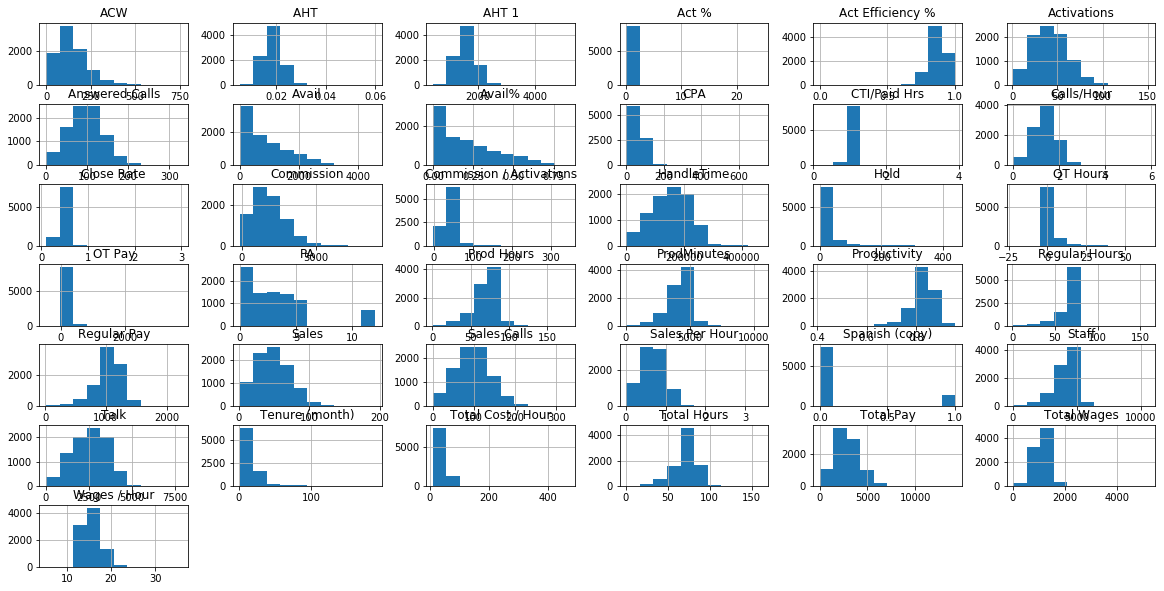

In [ ]:
df.hist(figsize=(20,10))

In [ ]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
>>> train_set, test_set = split_train_test(df, 0.2)

In [ ]:
>>> len(train_set)

7076

In [ ]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
df_with_id = df.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")

In [ ]:
>>> len(test_set)

1768

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["PA"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [ ]:
strat_test_set["PA"].value_counts()

1     307
3     297
2     290
4     287
5     233
0     217
12    138
Name: PA, dtype: int64

In [ ]:
len(strat_test_set)

1769

In [ ]:
>>> strat_test_set["PA"].value_counts() / len(strat_test_set)

1     0.173544
3     0.167891
2     0.163934
4     0.162239
5     0.131713
0     0.122668
12    0.078010
Name: PA, dtype: float64

In [ ]:
strat_test_set.head()

,PP End,Agent,Spanish (copy),Tenure (month),Title,PA,Site,Team Manager,Prod Hours,Regular Hours,Regular Pay,OT Hours,OT Pay,Total Hours,CTI/Paid Hrs,Wages / Hour,Total Pay,Productivity,Avail%,AHT 1,AHT,Sales Calls,Calls/Hour,Close Rate,Sales,Sales Per Hour,Act %,Act Efficiency %,Activations,Commission / Activations,Total Cost / Hour,CPA,ProdMinutes,Talk,Hold,ACW,Staff,Avail,HandleTime,Answered Calls,Commission,Total Wages
6290,9/20/2019,"Lechuga, Edgar",1,59,SAE,1,EP,"Aguilar, Aileen",98,80,1240.00,19,943.70,99,0.99,22.04,7377.83,0.84,0.027,1197.81,0.013864,223,2.25025,0.57,128,1.29162,0.9375,0.90625,120,43.28442,74.4483,61.4819,5861.48,4752.78,134,317,5818.5333,156.7000,267112,223,5194.13,2183.70
5794,9/6/2019,"Dowdell, Sean",0,32,AE,3,RF,"Thorne, Oakleigh",62,60,987.69,0,0.00,60,1.03,16.50,2721.29,0.80,0.225,1198.44,0.013871,98,1.63715,0.43,42,0.70164,1.3571,0.73810,57,30.41404,45.4609,47.7419,3711.00,2126.67,1,133,3711.0000,835.3333,117447,98,1733.60,987.69
6210,9/20/2019,"Frye, Jonathan",0,6,AAE,2,TH,"Rucker, Allison",75,75,1046.36,1,25.36,76,0.99,14.17,2712.97,0.83,0.220,1602.15,0.018543,109,1.44104,0.46,50,0.66103,1.0200,0.86000,51,32.18137,35.8669,53.1955,4503.82,2736.25,4,174,4470.6333,981.7500,174634,109,1641.25,1071.72
290,1/11/2019,"Wilson, Kathern",0,10,AE,3,TU,"Nesset, Joe",72,79,1295.11,3,106.09,82,0.88,17.13,3878.30,0.77,0.082,1370.13,0.015858,135,1.65077,0.46,62,0.75813,0.6935,0.87097,43,57.60698,47.4236,90.1930,4335.71,2979.90,3,231,4335.7000,355.1500,184967,135,2477.10,1401.20
3337,5/31/2019,"Hollingsworth, James",0,12,AE,3,RF,"Albright, James",68,68,1122.33,0,11.54,68,0.99,16.59,2387.62,0.86,0.217,2100.41,0.024310,76,1.11209,0.47,36,0.52678,0.8889,0.88889,32,39.17969,34.9374,74.6131,4075.30,2610.37,0,98,4075.2833,884.3333,159631,76,1253.75,1133.87


In [ ]:
strat_train_set.head()

,PP End,Agent,Spanish (copy),Tenure (month),Title,PA,Site,Team Manager,Prod Hours,Regular Hours,Regular Pay,OT Hours,OT Pay,Total Hours,CTI/Paid Hrs,Wages / Hour,Total Pay,Productivity,Avail%,AHT 1,AHT,Sales Calls,Calls/Hour,Close Rate,Sales,Sales Per Hour,Act %,Act Efficiency %,Activations,Commission / Activations,Total Cost / Hour,CPA,ProdMinutes,Talk,Hold,ACW,Staff,Avail,HandleTime,Answered Calls,Commission,Total Wages
2491,4/19/2019,"Thompson, Daniel",0,6,AAE,12,RF,RF Temp Team 3,52,52,732.90,0,0.00,52,0.99,14.00,1467.70,0.75,0.028,1508.45,0.017459,95,1.81471,0.37,35,0.66858,1.0000,0.91429,35,20.99429,28.0363,41.9343,3115.40,2261.80,0,132,3115.4000,85.9667,143303,95,734.80,732.90
4500,7/12/2019,"Ramirez, Jonathan",1,22,AE,1,EP,"Ortiz, Maribel",55,56,778.40,0,0.00,56,0.99,14.00,1805.83,0.83,0.378,1208.03,0.013982,79,1.42086,0.46,36,0.64748,0.8611,0.83333,31,33.14290,32.4790,58.2526,3303.96,1486.87,31,104,3303.9667,1249.2833,95434,79,1027.43,778.40
5706,9/6/2019,"Aldaffaie, Abdullah",0,17,AE,12,RF,"Padias, Alec",44,44,725.68,0,0.00,44,0.99,16.50,2522.07,0.71,0.002,1000.31,0.011578,118,2.68304,0.32,38,0.86403,1.6842,0.86842,64,28.06859,57.3458,39.4073,2622.71,1848.83,0,122,2622.7167,6.1667,118036,118,1796.39,725.68
647,2/8/2019,"Conner, Dan",0,16,AE,1,TH,"Young, Marcus",81,80,1320.00,1,41.76,81,1.00,16.76,2621.54,0.85,0.116,2290.94,0.026516,101,1.24292,0.41,41,0.50455,0.7561,0.75610,31,40.63806,32.2611,84.5658,4874.94,3600.73,2,179,4874.9167,567.0317,226803,99,1259.78,1361.76
1053,2/22/2019,"Hymer, Tell",0,4,AAE,2,RF,"Thorne, Oakleigh",73,73,1028.16,2,43.34,75,0.98,14.30,2261.90,0.79,0.171,1649.87,0.019096,109,1.45450,0.40,44,0.58714,0.7727,0.88636,34,35.01176,30.1828,66.5265,4394.40,2742.60,0,313,4394.4000,749.3667,179836,109,1190.40,1071.50


In [ ]:
df = strat_train_set.copy()

In [ ]:
corr_matrix = df.corr()

In [ ]:
corr_matrix["CPA"].sort_values(ascending=False)

CPA                         1.000000
Commission / Activations    0.581682
Avail                       0.317154
Avail%                      0.310789
Productivity                0.141395
Total Hours                 0.131857
Regular Hours               0.124657
Spanish (copy)              0.121539
AHT 1                       0.120873
AHT                         0.120873
Total Wages                 0.113297
Regular Pay                 0.105362
OT Hours                    0.079369
OT Pay                      0.069670
Staff                       0.063652
Prod Hours                  0.061445
ProdMinutes                 0.061089
Wages / Hour                0.025311
PA                          0.004862
Tenure (month)             -0.001892
Hold                       -0.014980
Total Pay                  -0.024280
Close Rate                 -0.029060
Commission                 -0.063034
Act Efficiency %           -0.081954
Total Cost / Hour          -0.099787
Act %                      -0.158596
T

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e3fba4668>,
      dtype=object)

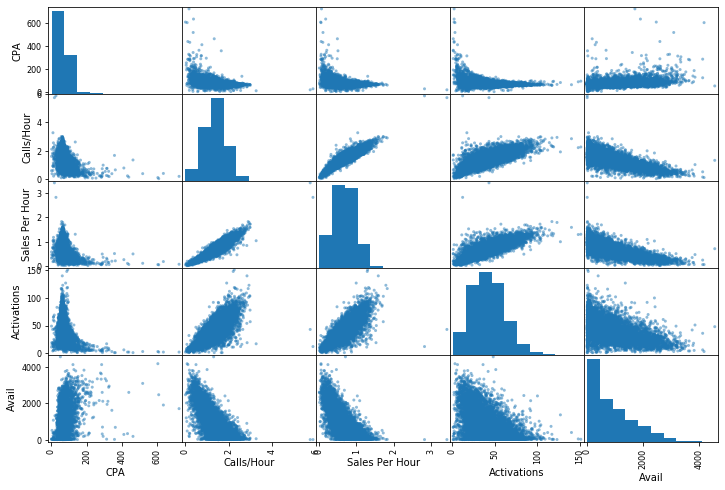

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["CPA", "Calls/Hour", "Sales Per Hour",
              "Activations", "Avail"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [ ]:
df = strat_train_set.drop("CPA", axis=1)
df_labels = strat_train_set["CPA"].copy()

In [ ]:
df_cat = df[["Title"]]
df_cat.head(10)

,Title
2491,AAE
4500,AE
5706,AE
647,AE
1053,AAE
7476,AAE
6827,AE
7899,AAE
8032,AE
1592,SAE


In [ ]:
>>> from sklearn.preprocessing import OrdinalEncoder
>>> ordinal_encoder = OrdinalEncoder()
>>> df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
>>> df_cat_encoded[:10]

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.]])

In [ ]:
>>> ordinal_encoder.categories_

[array(['AAE', 'AE', 'SAE'], dtype=object)]

In [ ]:
>>> from sklearn.preprocessing import OneHotEncoder
>>> cat_encoder = OneHotEncoder()
>>> df_cat_1hot = cat_encoder.fit_transform(df_cat)
>>> df_cat_1hot

<7075x3 sparse matrix of type '<class 'numpy.float64'>'
	with 7075 stored elements in Compressed Sparse Row format>

In [ ]:
>>> df_cat_1hot.toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


In [ ]:
df.head()

,PP End,Agent,Spanish (copy),Tenure (month),Title,PA,Site,Team Manager,Prod Hours,Regular Hours,Regular Pay,OT Hours,OT Pay,Total Hours,CTI/Paid Hrs,Wages / Hour,Total Pay,Productivity,Avail%,AHT 1,AHT,Sales Calls,Calls/Hour,Close Rate,Sales,Sales Per Hour,Act %,Act Efficiency %,Activations,Commission / Activations,Total Cost / Hour,ProdMinutes,Talk,Hold,ACW,Staff,Avail,HandleTime,Answered Calls,Commission,Total Wages
2491,4/19/2019,"Thompson, Daniel",0,6,AAE,12,RF,RF Temp Team 3,52,52,732.90,0,0.00,52,0.99,14.00,1467.70,0.75,0.028,1508.45,0.017459,95,1.81471,0.37,35,0.66858,1.0000,0.91429,35,20.99429,28.0363,3115.40,2261.80,0,132,3115.4000,85.9667,143303,95,734.80,732.90
4500,7/12/2019,"Ramirez, Jonathan",1,22,AE,1,EP,"Ortiz, Maribel",55,56,778.40,0,0.00,56,0.99,14.00,1805.83,0.83,0.378,1208.03,0.013982,79,1.42086,0.46,36,0.64748,0.8611,0.83333,31,33.14290,32.4790,3303.96,1486.87,31,104,3303.9667,1249.2833,95434,79,1027.43,778.40
5706,9/6/2019,"Aldaffaie, Abdullah",0,17,AE,12,RF,"Padias, Alec",44,44,725.68,0,0.00,44,0.99,16.50,2522.07,0.71,0.002,1000.31,0.011578,118,2.68304,0.32,38,0.86403,1.6842,0.86842,64,28.06859,57.3458,2622.71,1848.83,0,122,2622.7167,6.1667,118036,118,1796.39,725.68
647,2/8/2019,"Conner, Dan",0,16,AE,1,TH,"Young, Marcus",81,80,1320.00,1,41.76,81,1.00,16.76,2621.54,0.85,0.116,2290.94,0.026516,101,1.24292,0.41,41,0.50455,0.7561,0.75610,31,40.63806,32.2611,4874.94,3600.73,2,179,4874.9167,567.0317,226803,99,1259.78,1361.76
1053,2/22/2019,"Hymer, Tell",0,4,AAE,2,RF,"Thorne, Oakleigh",73,73,1028.16,2,43.34,75,0.98,14.30,2261.90,0.79,0.171,1649.87,0.019096,109,1.45450,0.40,44,0.58714,0.7727,0.88636,34,35.01176,30.1828,4394.40,2742.60,0,313,4394.4000,749.3667,179836,109,1190.40,1071.50


In [ ]:
df_numbers = df.drop(["PP End","Agent","Title","Site","Team Manager"], axis=1)

In [ ]:
df_numbers.head()

,Spanish (copy),Tenure (month),PA,Prod Hours,Regular Hours,Regular Pay,OT Hours,OT Pay,Total Hours,CTI/Paid Hrs,Wages / Hour,Total Pay,Productivity,Avail%,AHT 1,AHT,Sales Calls,Calls/Hour,Close Rate,Sales,Sales Per Hour,Act %,Act Efficiency %,Activations,Commission / Activations,Total Cost / Hour,ProdMinutes,Talk,Hold,ACW,Staff,Avail,HandleTime,Answered Calls,Commission,Total Wages
2491,0,6,12,52,52,732.90,0,0.00,52,0.99,14.00,1467.70,0.75,0.028,1508.45,0.017459,95,1.81471,0.37,35,0.66858,1.0000,0.91429,35,20.99429,28.0363,3115.40,2261.80,0,132,3115.4000,85.9667,143303,95,734.80,732.90
4500,1,22,1,55,56,778.40,0,0.00,56,0.99,14.00,1805.83,0.83,0.378,1208.03,0.013982,79,1.42086,0.46,36,0.64748,0.8611,0.83333,31,33.14290,32.4790,3303.96,1486.87,31,104,3303.9667,1249.2833,95434,79,1027.43,778.40
5706,0,17,12,44,44,725.68,0,0.00,44,0.99,16.50,2522.07,0.71,0.002,1000.31,0.011578,118,2.68304,0.32,38,0.86403,1.6842,0.86842,64,28.06859,57.3458,2622.71,1848.83,0,122,2622.7167,6.1667,118036,118,1796.39,725.68
647,0,16,1,81,80,1320.00,1,41.76,81,1.00,16.76,2621.54,0.85,0.116,2290.94,0.026516,101,1.24292,0.41,41,0.50455,0.7561,0.75610,31,40.63806,32.2611,4874.94,3600.73,2,179,4874.9167,567.0317,226803,99,1259.78,1361.76
1053,0,4,2,73,73,1028.16,2,43.34,75,0.98,14.30,2261.90,0.79,0.171,1649.87,0.019096,109,1.45450,0.40,44,0.58714,0.7727,0.88636,34,35.01176,30.1828,4394.40,2742.60,0,313,4394.4000,749.3667,179836,109,1190.40,1071.50


In [ ]:
num_pipeline = Pipeline([
       #('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
num_attribs = list(df_numbers)
cat_attribs = ["Title","Site","Team Manager"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)
    ])

df_prepared = full_pipeline.fit_transform(df)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
some_data = df.iloc[:5]

In [ ]:
some_labels = df_labels.iloc[:5]

In [ ]:
some_data_prepared = full_pipeline.transform(some_data)

In [ ]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [38.40405273 72.91271973 30.11975098 82.00842285 62.78173828]


In [ ]:
print("Labels:", list(some_labels))

Labels: [41.9343, 58.2526, 39.4073, 84.5658, 66.5265]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
df_predictions = lin_reg.predict(df_prepared)

In [ ]:
lin_mse = mean_squared_error(df_labels, df_predictions)

In [ ]:
lin_rmse = np.sqrt(lin_mse)

In [ ]:
lin_rmse

17.256495849820084

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

7.795985194850333e-06

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
 def display_scores(scores):
     print("Scores:", scores)
     print("Mean:", scores.mean())
     print("Standard deviation:", scores.std())

 display_scores(tree_rmse_scores)

Scores: [11.89147231 10.99614093 16.5677242   8.75131     7.81437094  9.6596376
  8.23366416 11.99227314  6.21736042 12.15354021]
Mean: 10.427749393243861
Standard deviation: 2.799330453485782


In [ ]:
lin_scores = cross_val_score(lin_reg, df_prepared, df_labels,
                              scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [22.6575062  16.91166156 25.80476764 11.73831319 14.89824016 22.94279819
 13.37005618 16.64350208 14.76462829 16.91617856]
Mean: 17.664765204669475
Standard deviation: 4.368604742098665


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(df_prepared, df_labels)
df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.9214870420547285

In [ ]:
forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                              scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [11.80468626  7.789381   13.0565463   3.96437886  3.73001274  6.62104293
  4.15464556  8.20333046  3.5549334  10.17306893]
Mean: 7.305202644033679
Standard deviation: 3.3315269209675153


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = [
    {'bootstrap': [False], 'n_estimators': [70,72,75], 'max_features': [91,93,95]},
  ]

In [ ]:
forest_reg = RandomForestRegressor()

In [ ]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)


In [ ]:
grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 93, 'n_estimators': 72}

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

7.13300368155805 {'bootstrap': False, 'max_features': 91, 'n_estimators': 70}
7.171517607479128 {'bootstrap': False, 'max_features': 91, 'n_estimators': 72}
7.27304922421057 {'bootstrap': False, 'max_features': 91, 'n_estimators': 75}
7.32009391864051 {'bootstrap': False, 'max_features': 93, 'n_estimators': 70}
7.128790888489278 {'bootstrap': False, 'max_features': 93, 'n_estimators': 72}
7.240026390941053 {'bootstrap': False, 'max_features': 93, 'n_estimators': 75}
7.475767656532169 {'bootstrap': False, 'max_features': 95, 'n_estimators': 70}
7.571986539916709 {'bootstrap': False, 'max_features': 95, 'n_estimators': 72}
7.349760973459756 {'bootstrap': False, 'max_features': 95, 'n_estimators': 75}


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.68666490e-05, 1.38289000e-03, 1.28606682e-03, 8.89195540e-04,
       6.22814816e-04, 2.29516116e-02, 4.60700798e-04, 7.70912988e-04,
       1.08133490e-03, 3.39675960e-03, 4.37949065e-03, 5.38131874e-02,
       6.66866886e-04, 1.60651117e-03, 6.60727270e-04, 7.82596013e-04,
       2.43752460e-03, 3.22833153e-02, 1.17951181e-03, 2.78262013e-03,
       2.45993379e-02, 2.56680582e-02, 8.76448289e-04, 3.17001991e-01,
       4.38059920e-01, 1.32670791e-02, 9.18492202e-04, 2.02485686e-03,
       9.00788810e-04, 1.29579649e-03, 1.61026847e-03, 2.16189311e-03,
       2.83003288e-03, 2.43357434e-03, 5.52890356e-03, 2.09476898e-02,
       3.22027002e-04, 2.01712440e-04, 6.17636589e-04, 6.90076620e-05,
       6.05677730e-05, 1.56144404e-04, 6.62294538e-05, 3.42126909e-05,
       2.38702504e-03, 5.15459395e-06, 1.71152601e-06, 6.19957334e-05,
       8.27577379e-04, 2.11591643e-07, 2.01231792e-05, 7.27499684e-09,
       1.94263041e-06, 1.16578594e-05, 9.74849241e-06, 5.67683368e-05,
      

In [ ]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4380599200094971, 'Commission / Activations'),
 (0.3170019910613027, 'Activations'),
 (0.05381318739168772, 'Total Pay'),
 (0.03228331526673649, 'Calls/Hour'),
 (0.025668058207473685, 'Act %'),
 (0.0245993378692405, 'Sales Per Hour'),
 (0.02295161163822896, 'Regular Pay'),
 (0.0209476897753078, 'Total Wages'),
 (0.013267079060213719, 'Total Cost / Hour'),
 (0.005528903560996157, 'Commission'),
 (0.004379490654878869, 'Wages / Hour'),
 (0.0033967596017710254, 'CTI/Paid Hrs'),
 (0.0028300328768744386, 'HandleTime'),
 (0.002782620131150082, 'Sales'),
 (0.0024375246018532924, 'Sales Calls'),
 (0.0024335743442320734, 'Answered Calls'),
 (0.0021618931144090445, 'Avail'),
 (0.0020248568646609065, 'Talk'),
 (0.001610268465309505, 'Staff'),
 (0.0016065111689217415, 'Avail%'),
 (0.001382890000209296, 'Tenure (month)'),
 (0.0012957964857569588, 'ACW'),
 (0.0012860668196991972, 'PA'),
 (0.0011795118063169013, 'Close Rate'),
 (0.0010813348986628624, 'Total Hours'),
 (0.0009184922022535968, 'Pro

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("CPA", axis=1)
y_test = strat_test_set["CPA"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                          scale=stats.sem(squared_errors)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


array([        nan, 10.79861255])

In [ ]:
final_rmse

7.285643139666942

In [ ]:
y_test

6290    61.4819
5794    47.7419
6210    53.1955
290     90.1930
3337    74.6131
         ...   
15      88.2155
462     71.5316
296     88.7155
4306    89.4514
7189    67.6773
Name: CPA, Length: 1769, dtype: float64

In [ ]:
final_predictions

array([67.40759306, 47.93092917, 53.13663889, ..., 90.20033333,
       83.5638375 , 71.8143    ])